# Clase 5 - Machine Learning - Supervisados

### ¿Qué es Machine Learning?
Machine Learning es una nueva forma de referirnos a modelos estadísticos que son capaces de ayudarnos a predecir información que no tenemos en un inicio a partir de información que si tenemos del "pasado".

### Tipos de aprendizaje:

- Supervisado:
Son una serie de modelos que son capaces de entrenarse a partir de una variable "etiqueta" o "label". Esta variable es la que interpretamos como "resultado" o "variable a predecir". Un ejemplo de esto sería el precio de un viaje en uber a partir de una serie de datos como horario, bateria del celular, distancia, zona de partida, zona de llegada, peligrosidad, rating del usuario que pide el viaje, etc.


- No supervisado:
Son una serie de modelos capaces de encontrar o agrupar instancias de un set de datos a partir de información que tenemos, podemos obtener información que desconocemos. Un ejemplo de esto sería tener un grupo de datos de comportamientos humanos y a partir de estos, tratar de agrupar a los humanos mas parecidos. Esto nos arrojaria información sobre las personas mas similares que antes no teníamos.


- Reforzado:
El aprendizaje reforzado, es similar a los dos grupos anteriores, con la diferencia de que tomamos un modelo ya previamente entrenado y lo reentrenamos con algún dato de nuestro interes. Esto es muy usual hoy por hoy con los modelos de LLM como por ejemplo ChatGPT. Usualmente uno reentrena a estos modelos con la información que tienen de nuestras preguntas, adaptándose a nosotros y a los tópicos que solemos consultar/pedir.

# Modelos supervisados

## Regresiónes
Las regresiones son modelos mas matemáticos básicos que suelen expresar relaciones mas sencillas entre datos. Esto usualmente se ve en estudios de variables mas bien físicas y no tanto sociológicas, aunque como todo hay excepciones.

### Regresión lineal
La regresión lineal es un modelo de aprendizaje supervisado que se utiliza para predecir un valor continuo. Su objetivo es encontrar la relación lineal entre una o más variables independientes (features) y una variable dependiente (target).

Tipo de problema: Supervisado → el modelo aprende a partir de datos etiquetados.

Objetivo: Minimizar una función de pérdida (por ejemplo, el error cuadrático medio).

Hipótesis del modelo: Se asume que la relación entre la variable independiente $x$ y la variable dependiente $y$ puede aproximarse por una combinación lineal:

$$
y = \beta_0 + \beta_1 x + \epsilon
$$

En donde:
- $\beta_0$: Ordenada de origen
- $\beta_1$: Pendiente
- $\epsilon$: Error o variabilidad

Las limitaciones de este modelo son:
- No modela relaciones no lineales (a menos que se extienda con polinomios o features transformadas)

- Sensible a outliers

- Supone que hay una relación lineal real entre variables


### Regresión polinómica
En el marco del Machine Learning, la regresión polinómica es una técnica de regresión que se utiliza cuando la relación entre las variables independientes (features) y la variable dependiente (target) no es lineal, pero se puede modelar como una combinación lineal de potencias de las variables independientes. Es decir, extiende la regresión lineal al incluir términos polinómicos de las variables.

La hipótesis del modelo: Se asume que la relación entre las variables independientes son una combinación no lineal polinómica de potencias.

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_n x^n + \epsilon
$$

En donde:
- $\beta_0$: Ordenada de origen
- $\beta_n$: coeficientes del polinomio
- $\epsilon$: Error o variabilidad
- $x$: Variable de entrenamiento
- $y$: Variable target

Las limitaciones de este modelo son:

- Overfitting: si se elige un grado muy alto para el polinomio, el modelo puede ajustarse demasiado a los datos de entrenamiento y no generalizar bien.

- Underfitting: si el grado es muy bajo, el modelo puede no capturar la complejidad de los datos.

### Regularización (Ridge, Lasso)

En Machine Learning, el objetivo principal de un modelo (por ejemplo, una regresión lineal) es aprender una función que prediga bien sobre datos nuevos, no sólo sobre los datos con los que fue entrenado. Esto se llama generalización.

Problema: Cuando un modelo se ajusta demasiado a los datos de entrenamiento (overfitting), aprende el "ruido" en lugar de las relaciones verdaderas. Esto causa mal desempeño en datos nuevos.

Solución: Ahí entra la regularización, que consiste en agregar una penalización al modelo para que no se vuelva demasiado complejo.

La hipótesis del modelo: La idea es penalizar los valores grandes de los pesos $w$ porque suelen indicar que un modelo se adapta demasiado al conjunto de entrenamiento. Por ejemplo regularización aplicada a una regresión lineal sería

$$
\hat{y} = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b 
$$

En donde aparecen estos $w_n$ que son los pesos agregados por este método. Luego se hace el siguiente cálculo:

#### Ridge

$$
Loss_{ridge} = Loss_{MSE} + \lambda \sum_{i=1}^{n} w_i^2
$$

En donde:
- $\lambda$: es un hiperparámetro que controla cuanta penalización se aplica.
- $w$: Son los pesos de cada parámetro
- $Loss_{MSE}$
$$
Loss_{MSE} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2
$$

#### Lasso
$$
Loss_{lasso} = Loss_{MSE} + \lambda \sum_{i=1}^n |w_i|
$$

También controla la complejidad del modelo.

Pero a diferencia de Ridge, puede hacer que algunos coeficientes sean exactamente cero → lo que equivale a selección automática de variables.

## Clasificación

### Regresión logística
La regresión logística es un algoritmo de clasificación supervisada que se utiliza para predecir la probabilidad de que una observación pertenezca a una clase particular.

A pesar de su nombre, no es un modelo de regresión (como la regresión lineal), sino un modelo de clasificación, normalmente binaria (dos clases), aunque existen extensiones para múltiples clases (regresión logística multinomial).

En su forma más simple (binaria), predice una variable de salida y que puede tomar dos valores: 0 o 1 (por ejemplo: “spam” o “no spam”, “positivo” o “negativo”, etc.).

La hipótesis del modelo:

1. Primero calcula una combinación lineal de las variables de entrada:

$$
z = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n = \mathbb{w}^T \mathbb{x}
$$

2. Luego, aplica una función sigmoide para convertir ese valor z en una probabilidad entre 0 y 1:
$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

Esto se interpreta como la probabilidad de que la observación pertenezca a la clase 1:
$$
P(y = 1 | x) = \sigma(\mathbb{w}^T \mathbb{x})
$$

3. Finalmente, si la probabilidad es mayor a cierto umbral (por defecto 0.5), se clasifica como 1, si no como 0.

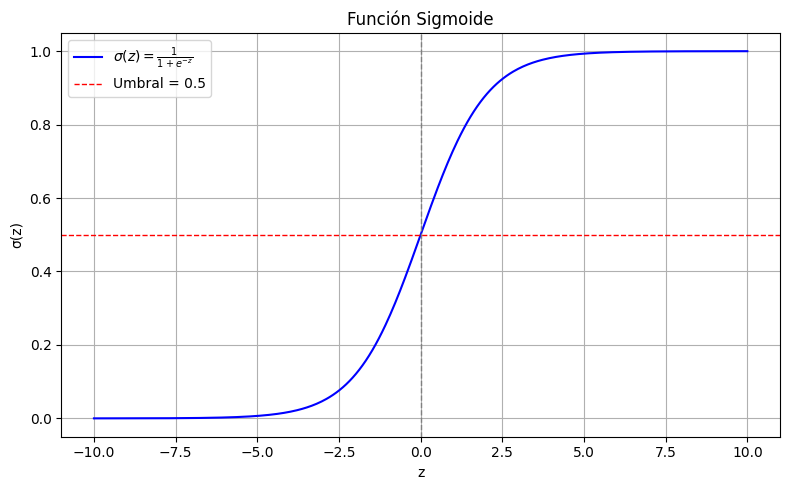

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Crear valores para z
z = np.linspace(-10, 10, 400)

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calcular valores de la sigmoide
sigmoid_values = sigmoid(z)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(z, sigmoid_values, label=r'$\sigma(z) = \frac{1}{1 + e^{-z}}$', color='blue')
plt.title('Función Sigmoide')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.grid(True)
plt.axhline(0.5, color='red', linestyle='--', linewidth=1, label='Umbral = 0.5')
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()
plt.show()


### K-Nearest Neighbors (KNN)
K-Nearest Neighbors (KNN) es un algoritmo supervisado de aprendizaje automático utilizado tanto para clasificación como para regresión, aunque es más comúnmente aplicado en problemas de clasificación.

KNN se basa en la proximidad entre los datos. Parte de la hipótesis de que:

"Los datos similares suelen encontrarse cerca en el espacio de características".

Esto quiere decir que, para predecir la clase (o valor) de un nuevo punto, el algoritmo busca los k puntos más cercanos (vecinos) en el conjunto de entrenamiento y toma una decisión en base a ellos.

**Como funciona?**
1. Definir k, el numero de vecinos que vamos a considerar
2. Calcular la distancia entre el punto a clasificar y todos los puntos del conjunto de entrenamiento. Las distancias mas comunes son:
- Euclidiana (la mas usada).
- Manhattan
- Minkowski, etc.
3. Seleccionar los k vecinos mas cercanos.
4. Tomar una desición:
- Para clasificación se toma la clase mas común entre los vecinos.
- Para regresión se toma el promedio (o mediana) de los valores.

/home/luciano/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127822 (\N{RED APPLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/luciano/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127820 (\N{BANANA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/luciano/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10067 (\N{BLACK QUESTION MARK ORNAMENT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


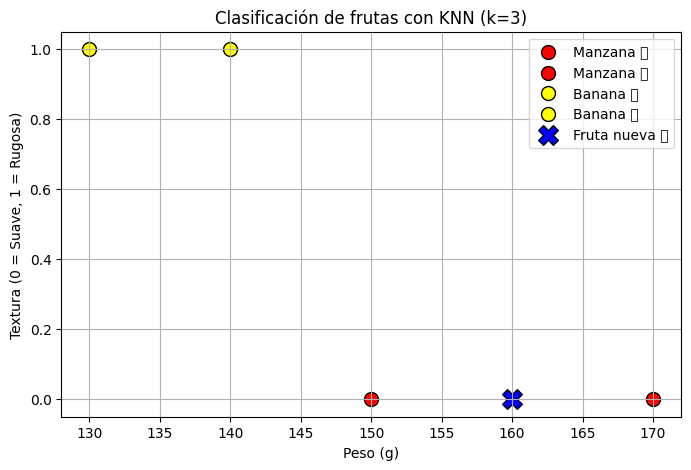

In [4]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Datos de entrenamiento
X = [
    [150, 0],  # Manzana
    [170, 0],  # Manzana
    [140, 1],  # Banana
    [130, 1]   # Banana
]
y = [0, 0, 1, 1]  # 0 = Manzana, 1 = Banana

# Nueva fruta a clasificar
nueva_fruta = [[160, 0]]

# Creamos y entrenamos el modelo
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
resultado = knn.predict(nueva_fruta)[0]

# Colores y etiquetas
colores = ['red', 'yellow']
etiquetas = ['Manzana 🍎', 'Banana 🍌']

# Plot
plt.figure(figsize=(8, 5))

# Puntos conocidos
for i, fruta in enumerate(X):
    plt.scatter(fruta[0], fruta[1], color=colores[y[i]], label=etiquetas[y[i]], s=100, edgecolor='k')

# Punto nuevo
plt.scatter(nueva_fruta[0][0], nueva_fruta[0][1], color='blue', label='Fruta nueva ❓', s=200, marker='X', edgecolor='k')

# Estética del gráfico
plt.xlabel("Peso (g)")
plt.ylabel("Textura (0 = Suave, 1 = Rugosa)")
plt.title("Clasificación de frutas con KNN (k=3)")
plt.legend()
plt.grid(True)
plt.show()


### Árboles de decisión

Un árbol de decisión es un modelo de aprendizaje supervisado que se utiliza tanto para clasificación como para regresión. Se llama así porque su estructura tiene forma de árbol, con nodos internos, ramas y hojas.

Es una herramienta muy intuitiva, ya que emula el proceso humano de tomar decisiones en base a una serie de preguntas o condiciones.

**Como funciona?**

El árbol se construye dividiendo el conjunto de datos en subconjuntos cada vez más pequeños, en base a condiciones sobre las variables (features). Este proceso se llama división recursiva y ocurre de la siguiente manera:

Se selecciona una variable y un umbral para dividir los datos de forma que se maximice la "pureza" (es decir, que los subconjuntos resultantes sean lo más homogéneos posible respecto al valor objetivo).

Esta división se repite en cada subconjunto resultante, creando nuevos nodos y ramas, hasta cumplir un criterio de parada (como una profundidad máxima o número mínimo de muestras en una hoja).

Las hojas del árbol contienen la predicción del modelo: una clase (en clasificación) o un valor numérico (en regresión).

**Que métricas usa?**

- Gini Impurity (para clasificación): mide la probabilidad de clasificar incorrectamente un ejemplo al azar.

- Entropía (inspirado en la teoría de la información): mide la cantidad de desorden o incertidumbre.

- MSE (Error Cuadrático Medio) o MAE (Error Absoluto Medio) (para regresión): evalúan la distancia entre los valores reales y los predichos.

**Ventajas**
- Muy fácil de interpretar.

- Requiere poca preparación de los datos (no necesita escalado, por ejemplo).

- Puede manejar tanto variables categóricas como numéricas.

**Desventajas**
- Tienden a sobreajustar (overfitting) si no se podan o limitan.

- Son inestables: pequeños cambios en los datos pueden cambiar la estructura del árbol.

- No generalizan tan bien como otros modelos más complejos.

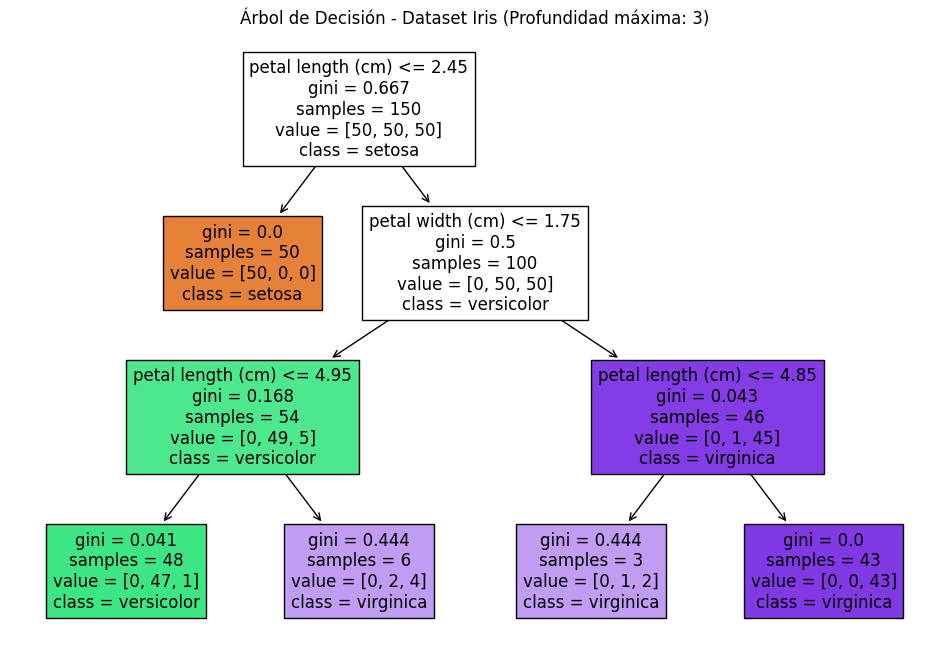

In [5]:
# Ejemplo simple de árbol de decisión con visualización
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Cargar el dataset de ejemplo
iris = load_iris()
X = iris.data
y = iris.target

# Entrenar un árbol de decisión simple
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

# Graficar el árbol
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Árbol de Decisión - Dataset Iris (Profundidad máxima: 3)")
plt.show()


### Random Forest


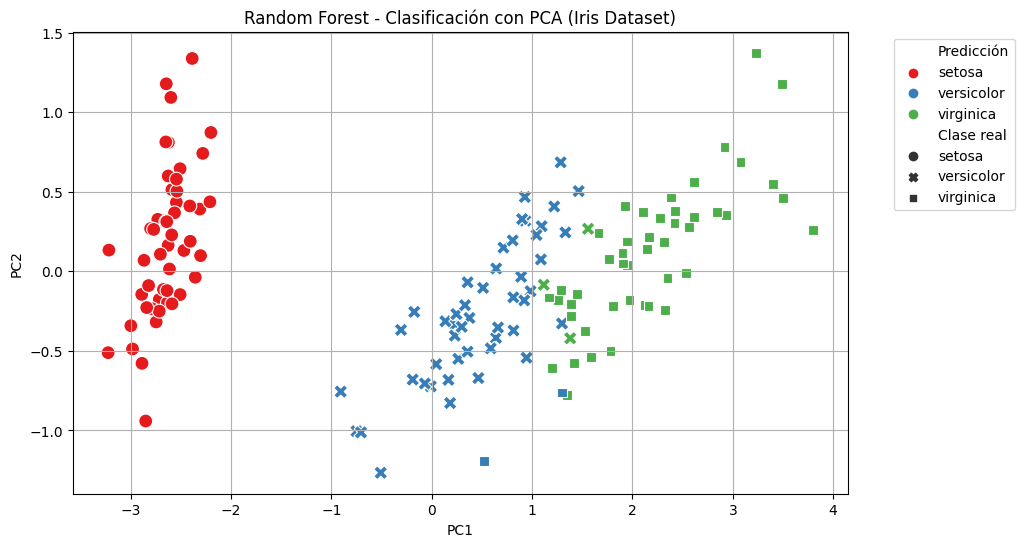

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import numpy as np

# Entrenar un Random Forest con los mismos datos
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_clf.fit(X, y)

# Reducir la dimensionalidad para visualización (usamos PCA a 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Predecir las clases con el modelo
y_pred = rf_clf.predict(X)

# Preparar DataFrame para graficar
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Predicción'] = iris.target_names[y_pred]
df['Clase real'] = iris.target_names[y]

# Graficar
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Predicción', style='Clase real', palette='Set1', s=100)
plt.title("Random Forest - Clasificación con PCA (Iris Dataset)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### Support Vector Machines (SVM)

SVM (Máquina de Vectores de Soporte) es un algoritmo de aprendizaje supervisado que se utiliza principalmente para clasificación (aunque también puede usarse para regresión).

El objetivo principal de una SVM es encontrar el hiperplano óptimo que separa de la mejor forma posible dos clases de datos.

Imaginá que tenés puntos en un espacio (por ejemplo, en 2D), y cada punto está etiquetado como perteneciente a una clase (por ejemplo, rojo o azul). Una SVM va a buscar una línea (o plano en dimensiones mayores) que separe los puntos de diferentes clases con el mayor margen posible.

Ese margen es la distancia entre la línea (o plano) y los puntos más cercanos de cada clase, conocidos como los vectores de soporte. De ahí el nombre.

**¿Y si los datos no son linealmente separables?**
SVM tiene dos herramientas clave para tratar esto:

1. Soft Margin: permite ciertos errores de clasificación, usando una penalización controlada por un parámetro  que Balancea entre maximizar el margen y minimizar errores.

2. Kernel Trick: si los datos no se pueden separar en su espacio original, los transforma a un espacio de mayor dimensión donde sí puedan separarse linealmente. Esto se hace usando funciones kernel, como:

- Lineal

- Polinomial

- RBF (Radial Basis Function)

- Sigmoida

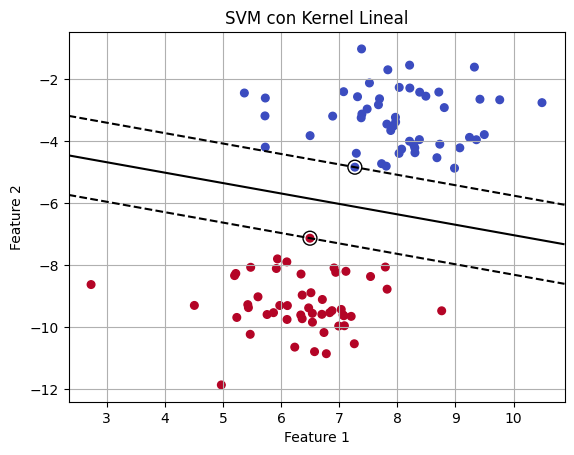

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# 1. Generar datos de ejemplo
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# 2. Crear el modelo SVM
modelo = svm.SVC(kernel='linear')  # Usamos un kernel lineal
modelo.fit(X, y)

# 3. Dibujar puntos de datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)

# 4. Dibujar el hiperplano
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Crear una malla de coordenadas
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Calcular la función de decisión para cada punto de la malla
Z = modelo.decision_function(xy).reshape(XX.shape)

# Dibujar el hiperplano y los márgenes
plt.contour(XX, YY, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

# 5. Dibujar los vectores de soporte
plt.scatter(modelo.support_vectors_[:, 0], modelo.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.title("SVM con Kernel Lineal")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


## Redes neuronales (perceptrón y MLP)

Las redes neuronales artificiales son un modelo computacional inspirado en el funcionamiento del cerebro humano. Se utilizan en Machine Learning para aproximar funciones complejas, tanto para clasificación como regresión, entre otras tareas.

Son especialmente útiles cuando las relaciones entre variables no son lineales o cuando los datos tienen una estructura compleja.

**¿Como funciona?**

El perceptrón es la unidad más básica de una red neuronal artificial. Fue propuesto por Frank Rosenblatt en 1958.

Su fórmula es la siguiente:

1. Se calcula la suma ponderada de las entradas:
$$
z = \sum_{i=1}^{n} w_i x_i + b
$$

2. Se pasa por una función de activación (por ejemplo la función escalón)
$$
y = f(z) = \{0 \hspace{0.25cm} z >= 0 \hspace{0.5cm} 0 \hspace{0.25cm} z < 0\}
$$

**Luego tenemos el perceptrón multicapa (MLP)**
Un MLP es una red neuronal con una o más capas ocultas entre la entrada y la salida. Permite aprender funciones no lineales.

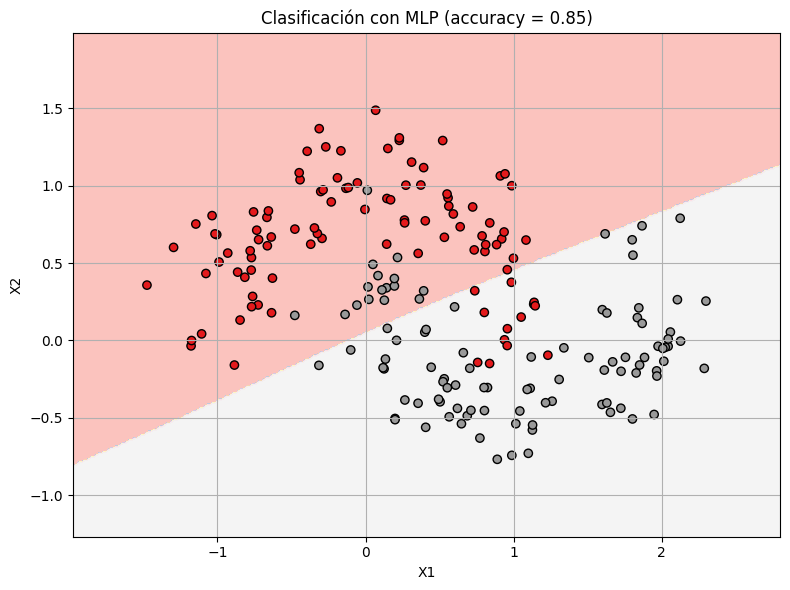

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generar un conjunto de datos no lineal
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar un MLP sencillo
mlp = MLPClassifier(hidden_layer_sizes=(5,), activation='tanh', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Predecir y evaluar
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Crear una malla para graficar la frontera de decisión
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 300),
                     np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 300))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.title(f"Clasificación con MLP (accuracy = {accuracy:.2f})")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.tight_layout()
plt.show()
